#### Tweets have no sentiments label

Positive and Negative data are extracted from the dataset by humans

In [1]:
import pandas as pd

data = pd.read_csv("datasets/tweets.csv", encoding = "utf-8")
positive_data = pd.read_csv("datasets/positive.csv", encoding = "utf-8")
negative_data = pd.read_csv("datasets/negative.csv", encoding = "utf-8")

data.head()

,tweet
0,احد خيارات التنزهة بمدينة الرياض حديقة الحيوان...
1,حديقة جميلة للاطفال وسعر دخول ممتاز واكشاك بس...
2,ممتاز جدا عندي بس بعض الملاحظات والاقتراحات\n١...
3,حديقة منظمة وبها عديد كبير من الحيوانات\nالخدم...
4,فيه تجديدات حلوة ومكان جميل وسعر مناسب، نتمنى ...


In [ ]:
import nltk

nltk.download("stopwords")

Language Processing Steps: Tokenization, Remove punctuations, Remove stopwords and Stemming.

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from snowballstemmer import stemmer

In [4]:
import string

def sanitize_text(text):
  numbers = "0123456789"
  arabic_punctuations = '''`÷×؛<>_()*^ـ،/:"؟.,'~¦+|!”…“–ـ'''
  english_puncuations = string.punctuation

  chars_to_remove = numbers  + arabic_punctuations + english_puncuations

  for char in chars_to_remove:
    text = text.replace(char, "")

  text = text.replace("\n", " ")
  text = text.strip()

  return text


In [5]:
stop_words = stopwords.words("arabic")
stemmer = stemmer("arabic")

def process_text(text, to_array = False):
  text = sanitize_text(text)
  
  tokens = word_tokenize(text)
  tokens = [token for token in tokens if token not in stop_words]
  tokens = [stemmer.stemWord(token) for token in tokens]

  return tokens if to_array else " ".join(tokens).strip()

In [6]:
tweet = "أنا أحب الذهاب إلى الحديقة، كل يوم 9 صباحًا مع رفاقي هؤلاء!"

processed_tweet = process_text(tweet)

processed_tweet

'احب ذهاب حديق يوم صباح رفاق'

In [7]:
data["processed_tweet"] = data["tweet"].apply(process_text, to_array = True)

data.drop_duplicates(subset = "processed_tweet", inplace = True)

In [8]:
positive_data["processed_word"] = positive_data["word"].apply(process_text)

positive_data.drop_duplicates(subset = "processed_word", inplace = True)
positive_data.dropna(subset = "processed_word", inplace = True)

In [9]:
negative_data["processed_word"] = negative_data["word"].apply(process_text)

negative_data.drop_duplicates(subset = "processed_word", inplace = True)
negative_data.dropna(subset = "processed_word", inplace = True)

In [ ]:
# too slow

# def get_polarity(words):
#   score = 0

#   for word in words:
#     positive_word = positive_data[positive_data["processed_word"] == word]
#     if len(positive_word) > 0:
#       positive_word = positive_word.iloc[0]
#       score += positive_word["score"]

#     negative_word = negative_data[negative_data["processed_word"] == word]
#     if len(negative_word) > 0:
#       negative_word = negative_word.iloc[0]
#       score += negative_word["score"]

#   polarity = "positive" if score > 0 else "negative" if score < 0 else "neutral"

#   return score, polarity

In [14]:
positive_dict = dict()

for _, row in positive_data.iterrows():
    word=row['processed_word'].strip()
    positive_dict[word] = int(row['score'])

negative_dict = dict()

for _, row in negative_data.iterrows():
    word=row['processed_word'].strip()
    negative_dict[word] = int(row['score'])

In [32]:
positive_dict = dict()

for _, row in positive_data.iterrows():
    word = row['processed_word']
    positive_dict[word] = int(row['score'])

negative_dict = dict()

for _, row in negative_data.iterrows():
    word = row['processed_word']
    negative_dict[word] = int(row['score'])

In [38]:
def get_polarity(words):
  score = 0

  for word in words:
      if (word in positive_dict):
          score += positive_dict[word]
  for word in words:
      if (word in negative_dict):
          score += negative_dict[word]

  polarity = "positive" if score > 0 else "negative" if score < 0 else "neutral"

  return score, polarity

In [39]:
for idx, row in data.iterrows():
  processed_tweet = data.loc[idx, "processed_tweet"]

  score, polarity = get_polarity(processed_tweet)
  data.loc[idx, "polarity"] = polarity
  data.loc[idx, "polarity_score"] = score

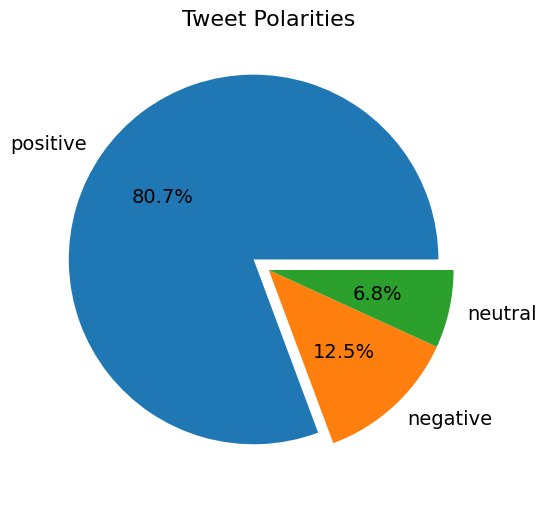

In [40]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(figsize = (6, 6))

x = data["polarity"].value_counts()
labels = data["polarity"].value_counts().index
explode = (0.1, 0, 0)

axis.pie
axis.pie(x = x, labels = labels, autopct = "%1.1f%%", explode = explode, textprops = { "fontsize": 14 })
axis.set_title("Tweet Polarities", fontsize = 16, pad = 10)

plt.show()

In [41]:
positive_tweets = data[data["polarity"] == "positive"]
positive_tweets = positive_tweets.sort_values(by = "polarity_score", ascending = False)

positive_tweets[["tweet", "polarity_score"]].head()

,tweet,polarity_score
15124,"""متحف حائل"".. سياحة مشوقة عبر الزمن في ""شتاء ا...",116.0
14642,"قصر جميل لكن مهمل من الدولة\nحكاية قصر ""الخواج...",109.0
16223,والله رهيبة بشكل مو طبيعي وحلوة جداً في الشتاء...,103.0
14613,عرف الموقع التاريخي بـداية بـ قصر جبره والذي ي...,91.0
21153,متحف رائع ويستحق الزيارة لمعرفة تاريخ الأحساء ...,90.0


In [42]:
negative_tweets = data[data["polarity"] == "negative"]
negative_tweets = negative_tweets.sort_values(by = "polarity_score", ascending = True)

negative_tweets[["tweet", "polarity_score"]].head()

,tweet,polarity_score
8667,سيئة للغاية أسعار مبالغ فيها طريقة استخدام الب...,-16.0
1806,سعر تذكرة الدخول ١٠٠ ريال للشخص ولا تتضمن شي ب...,-13.0
6649,للاسف البيك في المنطقه الشرقيه ادارتهم فاشله خ...,-13.0
14038,سعره مبالغ فيه و المحلات تحت مقفله وشبه مهجورة...,-13.0
10916,برد وزحمه وشباب غير مسؤول ولا واعي بان للاخرين...,-11.0


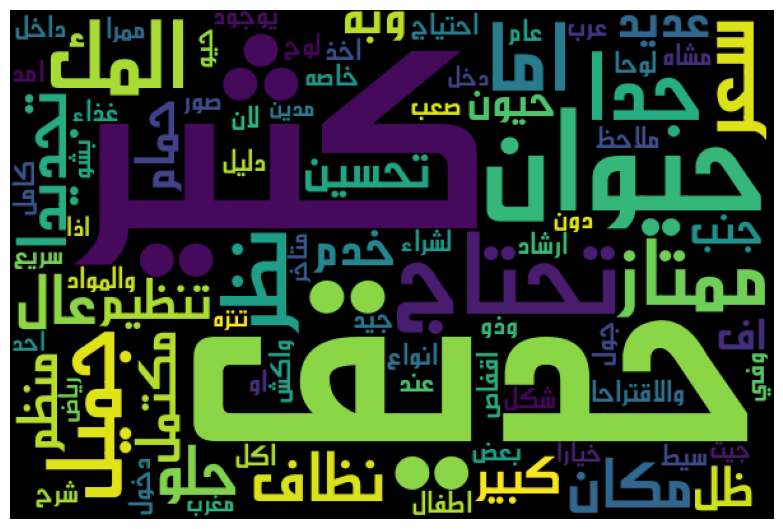

In [88]:
from wordcloud import WordCloud
from bidi.algorithm import get_display
import arabic_reshaper

i = 0
words = []

for tweet in data["processed_tweet"]:
  for word in tweet:
    i = i + 1
    if i > 100:
      break

    words.append(word)

words = " ".join(words)
reshaped_words = arabic_reshaper.reshape(words)
tweets = get_display(reshaped_words)

tweet_wordcloud = WordCloud(font_path = "assets/DroidSansMono.ttf", min_font_size = 10,
                        width = 600, height = 400, background_color = "black").generate(tweets)

figure, axis = plt.subplots(figsize = (8, 6))
axis.imshow(tweet_wordcloud)
figure.tight_layout(pad = 0)
axis.axis("off")

plt.show()

In [85]:
positive_words = []

for word in positive_data["word"].values:
  positive_words.append(word)

positive_words = " ".join(positive_words)

negative_words = []

for word in negative_data["word"].values:
  negative_words.append(word)

negative_words = " ".join(negative_words)

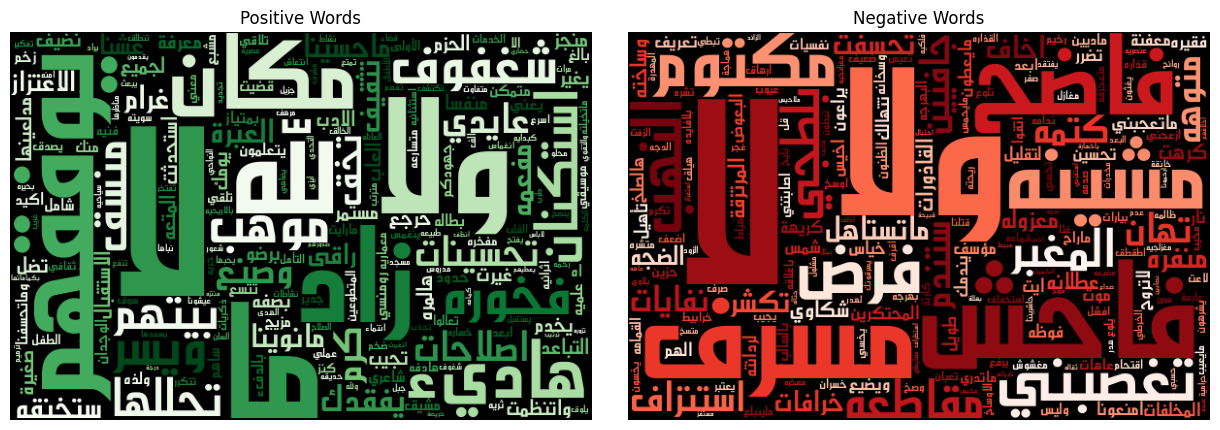

In [89]:
figure, axis = plt.subplots(1, 2, figsize = (12, 10))

reshaped_positive_words = arabic_reshaper.reshape(positive_words)
positive_words = get_display(reshaped_positive_words)

positive_wordcloud = WordCloud(font_path = "assets/DroidSansMono.ttf", min_font_size = 10,
                        width = 600, height = 400,
                        background_color = "black", colormap = "Greens").generate(positive_words)

axis[0].set_title("Positive Words")
axis[0].imshow(positive_wordcloud)
figure.tight_layout(pad = 0)
axis[0].axis("off")

reshaped_negative_words = arabic_reshaper.reshape(negative_words)
negative_words = get_display(reshaped_negative_words)

negative_wordcloud = WordCloud(font_path = "assets/DroidSansMono.ttf", min_font_size = 10,
                        width = 600, height = 400,
                        background_color = "black", colormap = "Reds").generate(negative_words)

axis[1].set_title("Negative Words")
axis[1].imshow(negative_wordcloud)
figure.tight_layout(pad = 0)
axis[1].axis("off")

plt.show()

In [91]:
tweets = data["tweet"].apply(process_text)

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 5000
max_sequence_length = 50

tokenizer = Tokenizer(num_words = num_words)

tokenizer.fit_on_texts(tweets.values)

sequences = tokenizer.texts_to_sequences(tweets.values)

sequences = pad_sequences(sequences, maxlen = max_sequence_length)

tweets[25], sequences[25]

('مكان جميل انصح زيار رسوم دخول',
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  1, 16,  6, 80, 11]))

In [120]:
polarity_encoder = {
  "negative": 0,
  "neutral": 1,
  "positive": 2,
}

y = data["polarity"].map(polarity_encoder).values

In [121]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sequences, y, random_state = 0)

In [122]:
import numpy as np

positive_count = np.count_nonzero(y_train == 2)
neutral_count = np.count_nonzero(y_train == 1)
negative_count = np.count_nonzero(y_train == 0)

print(f"counts: P={positive_count}, U={neutral_count}, N={negative_count}")

average_count = (positive_count + neutral_count + negative_count) / 3

positive_weight = average_count / positive_count
neutral_weight = average_count / neutral_count
negative_weight = average_count / negative_count

print(f"weights: P={positive_weight}, U={neutral_weight}, N={negative_weight}")

class_weight = {
  0: negative_weight,
  1: neutral_weight,
  2: positive_weight
}

counts: P=12026, U=1024, N=1890
weights: P=0.41410277731581574, U=4.86328125, N=2.634920634920635


In [123]:
from keras.models import Sequential
from keras.layers import Input, Embedding, Dense, LSTM
from keras.optimizers import Adam

model = Sequential([
  Input(shape = (max_sequence_length, )),
  Embedding(input_dim = num_words, output_dim = 32),
  LSTM(units = 16, dropout = 0.2),
  Dense(units = 3, activation = "softmax")
])

model.compile(optimizer = Adam(learning_rate = 0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [125]:
model_output = model.fit(x_train, y_train, class_weight = class_weight, batch_size = 128, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9603 - loss: 0.1455 - val_accuracy: 0.8920 - val_loss: 0.3532
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9691 - loss: 0.1361 - val_accuracy: 0.8958 - val_loss: 0.3620
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9735 - loss: 0.1223 - val_accuracy: 0.8930 - val_loss: 0.3715
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9714 - loss: 0.1161 - val_accuracy: 0.8964 - val_loss: 0.3748
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9696 - loss: 0.1212 - val_accuracy: 0.8954 - val_loss: 0.3838
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9744 - loss: 0.1052 - val_accuracy: 0.8994 - val_loss: 0.3862
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9762 - loss: 0.1042 - val_accuracy: 0.9028 - val_loss: 0.3838
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9813 - loss: 0.0969 - val_accu

In [128]:
def create_model(output_dim = 32, units = 16, dropout = 0.2, learning_rate = 0.001):
  model = Sequential([
    Input(shape = (max_sequence_length, )),
    Embedding(input_dim = num_words, output_dim = output_dim),
    LSTM(units = units, dropout = dropout),
    Dense(units = 3, activation = "softmax")
  ])

  model.compile(optimizer = Adam(learning_rate =learning_rate), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

  return model

In [129]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

estimator = KerasClassifier(model = create_model, batch_size = 128, epochs = 25, verbose = 0)

param_grid = {
  "model__output_dim": [32, 64],
  "model__units": [16, 32, 64],
  "model__dropout": [0.2, 0.5],
  "model__learning_rate": [0.01, 0.001, 0.0001],
}

cv = 5

grid = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = cv, verbose = 0)

grid_output = grid.fit(x_train, y_train)

In [130]:
results_data = pd.DataFrame(grid_output.cv_results_)

results_data.to_csv("21-dumps/grid-search-results.csv", index = False)

In [132]:
grid_output.best_params_, grid_output.best_score_

({'model__dropout': 0.5,
  'model__learning_rate': 0.001,
  'model__output_dim': 32,
  'model__units': 32},
 0.9091700133868807)

In [133]:
model = create_model(output_dim = 32, units = 32, dropout = 0.5, learning_rate = 0.001)

model_output = model.fit(x_train, y_train, class_weight = class_weight, batch_size = 128, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.4722 - loss: 1.0584 - val_accuracy: 0.7470 - val_loss: 0.6866
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7821 - loss: 0.7570 - val_accuracy: 0.8464 - val_loss: 0.4122
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8495 - loss: 0.5927 - val_accuracy: 0.8400 - val_loss: 0.3974
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8732 - loss: 0.4695 - val_accuracy: 0.8558 - val_loss: 0.3283
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8951 - loss: 0.3841 - val_accuracy: 0.8833 - val_loss: 0.3025
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9106 - loss: 0.3244 - val_accuracy: 0.8775 - val_loss: 0.3116
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9141 - loss: 0.2864 - val_accuracy: 0.8918 - val_loss: 0.2867
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9254 - loss: 0.2444 - val_acc

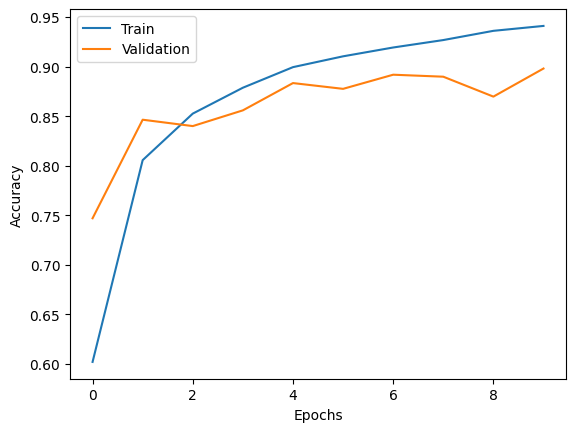

In [134]:
plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
model.save("21-dumps/model.keras")

In [136]:
from joblib import dump

dump(tokenizer, "21-dumps/tokenizer.pkl")

['21-dumps/tokenizer.pkl']

In [138]:
from keras.models import load_model
from joblib import load

model = load_model("21-dumps/model.keras")
tokenizer = load("21-dumps/tokenizer.pkl")

In [150]:
def predict_tweets_sentiments(tweets):
  sentiments = []
  tweets = [process_text(tweet) for tweet in tweets]

  sequences = tokenizer.texts_to_sequences(tweets)
  sequences = pad_sequences(sequences, maxlen = max_sequence_length)

  predictions = model.predict(sequences)
  for prediction in predictions:
    prediction = np.argmax(prediction, axis = 0)
    sentiments.append("negative" if prediction == 0 else "neutral" if prediction == 1 else "positive")

  return sentiments

In [161]:
sample_data = [
  "مكان متسخ",
  "مكان رائع وجميل",
  "من أجمل الأماكن التي زرتها بحياتي",
  "يمكن التسوق فيها"
]

predicted_sentiments = predict_tweets_sentiments(sample_data)

predicted_sentiments

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


['neutral', 'positive', 'positive', 'neutral']